# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from api_keys import geoapify_key
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city =citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | jilma
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | san fernando de apure
Processing Record 11 of Set 1 | petauke
Processing Record 12 of Set 1 | saint-francois
Processing Record 13 of Set 1 | kapuskasing
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | shubarshi
Processing Record 16 of Set 1 | vadso
Processing Record 17 of Set 1 | soure
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | pathri
Processing Record 22 of Set 1 | stanley


Processing Record 37 of Set 4 | howard springs
Processing Record 38 of Set 4 | hsinchu
Processing Record 39 of Set 4 | gizo
Processing Record 40 of Set 4 | nadvoitsy
Processing Record 41 of Set 4 | acapulco de juarez
Processing Record 42 of Set 4 | moree
Processing Record 43 of Set 4 | mangai
Processing Record 44 of Set 4 | uturoa
Processing Record 45 of Set 4 | kupino
Processing Record 46 of Set 4 | coahuayana de hidalgo
Processing Record 47 of Set 4 | pingliang
Processing Record 48 of Set 4 | albany
Processing Record 49 of Set 4 | necochea
Processing Record 0 of Set 5 | ribeira grande
Processing Record 1 of Set 5 | zambezi
Processing Record 2 of Set 5 | jiagedaqi
Processing Record 3 of Set 5 | greymouth
Processing Record 4 of Set 5 | rakaw
Processing Record 5 of Set 5 | sibiti
Processing Record 6 of Set 5 | alice springs
Processing Record 7 of Set 5 | kenai
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | zouerate
Processing Record 10 of Set 5 | mugia
Processing Reco

City not found. Skipping...
Processing Record 31 of Set 8 | ceeldheer
Processing Record 32 of Set 8 | afaahiti
Processing Record 33 of Set 8 | roma
Processing Record 34 of Set 8 | antsiranana
Processing Record 35 of Set 8 | vila franca do campo
Processing Record 36 of Set 8 | allada
Processing Record 37 of Set 8 | miquelon
Processing Record 38 of Set 8 | northam
Processing Record 39 of Set 8 | marshfield
Processing Record 40 of Set 8 | san andres
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | minot air force base
Processing Record 43 of Set 8 | chonchi
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | tokar
Processing Record 46 of Set 8 | pitkyaranta
Processing Record 47 of Set 8 | manosque
Processing Record 48 of Set 8 | kotlas
Processing Record 49 of Set 8 | igarka
Processing Record 0 of Set 9 | mopti
Processing Record 1 of Set 9 | fale old settlement
Processing Record 2 of Set 9 | morondava
Processing Record 3 of Set 9 | el granada
Proce

Processing Record 21 of Set 12 | amlapura
Processing Record 22 of Set 12 | rio grande
Processing Record 23 of Set 12 | bushehr
Processing Record 24 of Set 12 | cidreira
Processing Record 25 of Set 12 | berezovyy
Processing Record 26 of Set 12 | ouellah
City not found. Skipping...
Processing Record 27 of Set 12 | ambon
Processing Record 28 of Set 12 | brisas barra de suchiate
Processing Record 29 of Set 12 | lorengau
Processing Record 30 of Set 12 | torghay
Processing Record 31 of Set 12 | pueblo
Processing Record 32 of Set 12 | goure
Processing Record 33 of Set 12 | lamu
Processing Record 34 of Set 12 | kaya
Processing Record 35 of Set 12 | ongjin
Processing Record 36 of Set 12 | tolanaro
Processing Record 37 of Set 12 | langres
Processing Record 38 of Set 12 | karaton
Processing Record 39 of Set 12 | melekeok village
Processing Record 40 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 41 of Set 12 | anloga
Processing Record 42 of Set 12 | kataragama
City not found

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,11.14,96,100,2.93,IE,1698799956
1,waitangi,-43.9535,-176.5597,14.34,95,100,4.92,NZ,1698799880
2,adamstown,-25.0660,-130.1015,22.63,67,3,4.16,PN,1698799876
3,port-aux-francais,-49.3500,70.2167,4.11,91,100,12.79,TF,1698799877
4,west island,-12.1568,96.8225,26.99,74,40,7.72,CC,1698799934


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities", index_label="City_ID")



In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,11.14,96,100,2.93,IE,1698799956
1,waitangi,-43.9535,-176.5597,14.34,95,100,4.92,NZ,1698799880
2,adamstown,-25.0660,-130.1015,22.63,67,3,4.16,PN,1698799876
3,port-aux-francais,-49.3500,70.2167,4.11,91,100,12.79,TF,1698799877
4,west island,-12.1568,96.8225,26.99,74,40,7.72,CC,1698799934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

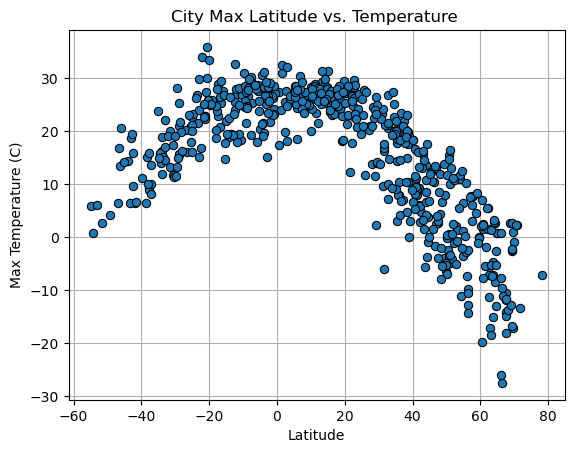

In [9]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

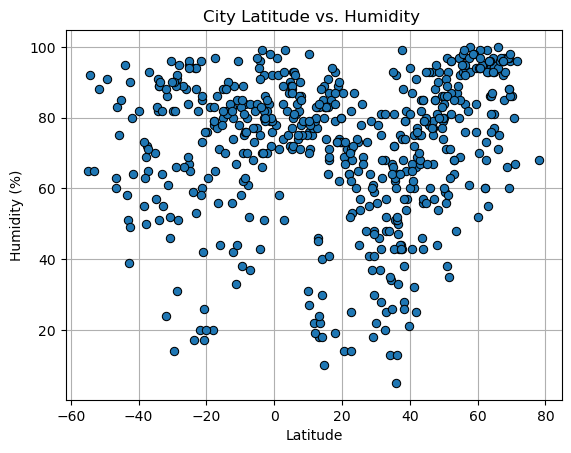

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

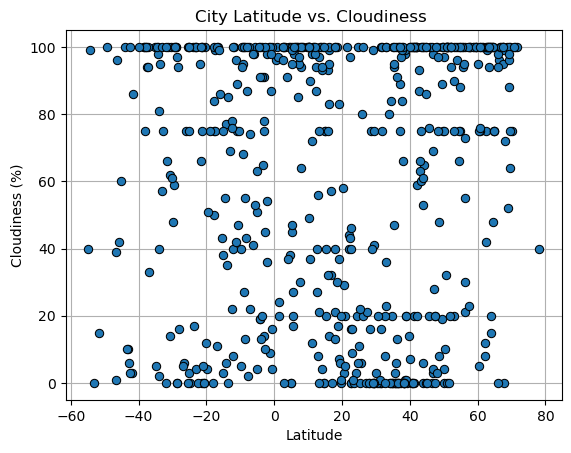

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

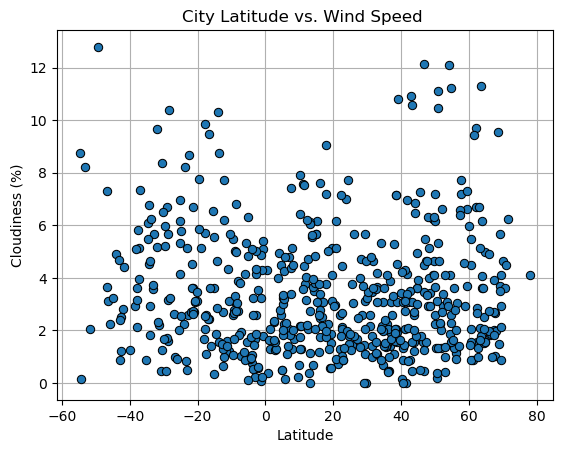

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Wind Speed ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,11.14,96,100,2.93,IE,1698799956
5,yellowknife,62.4560,-114.3525,-5.71,73,75,1.54,CA,1698799902
6,jilma,35.2731,9.4239,17.79,81,47,2.01,TN,1698800099
7,susuman,62.7833,148.1667,-17.23,99,99,1.34,RU,1698800008
8,vilyuchinsk,52.9306,158.4028,2.15,68,90,0.42,RU,1698799890


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,14.34,95,100,4.92,NZ,1698799880
2,adamstown,-25.0660,-130.1015,22.63,67,3,4.16,PN,1698799876
3,port-aux-francais,-49.3500,70.2167,4.11,91,100,12.79,TF,1698799877
4,west island,-12.1568,96.8225,26.99,74,40,7.72,CC,1698799934
10,petauke,-14.2426,31.3253,18.91,82,77,4.63,ZM,1698800101


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7535551999177312


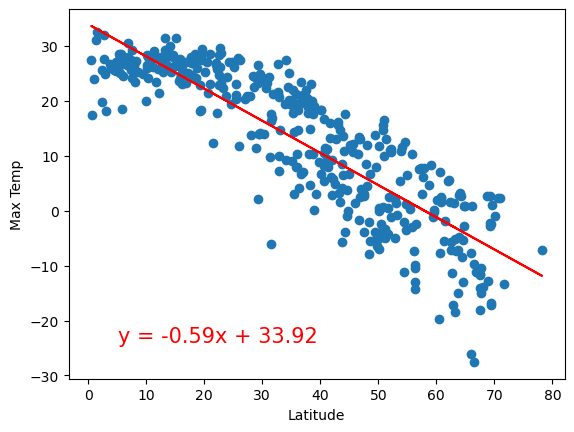

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.548443164620971


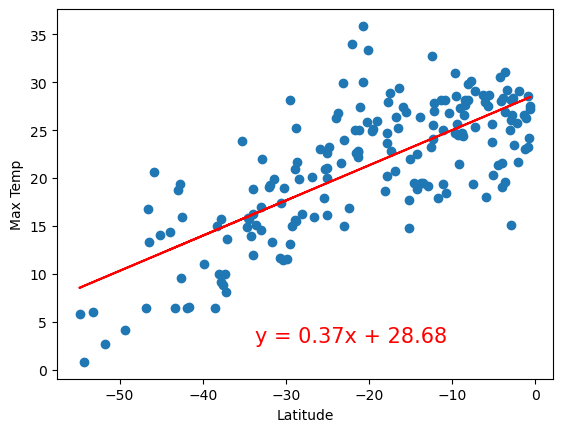

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

Discussion about the linear relationship: Northern Hemisphere, you can appreciate that the max temperature drops as the latitude increases, the r-value can be rounded up to 0.80. In the Southern Hemisphere the r-value can be rounded up to 0.53

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05111617261855421


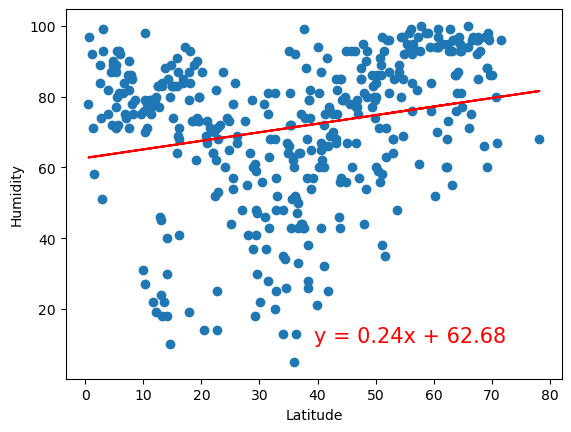

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.008939486573860577


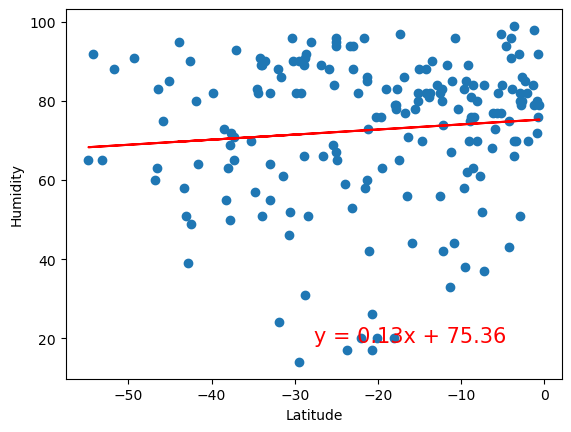

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and huminity 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.023185399241969818


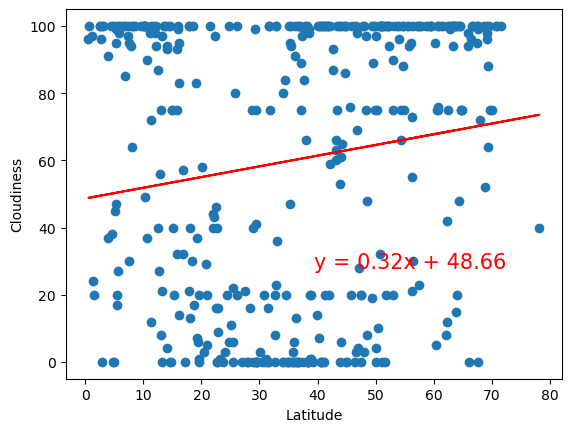

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.0005057522149213225


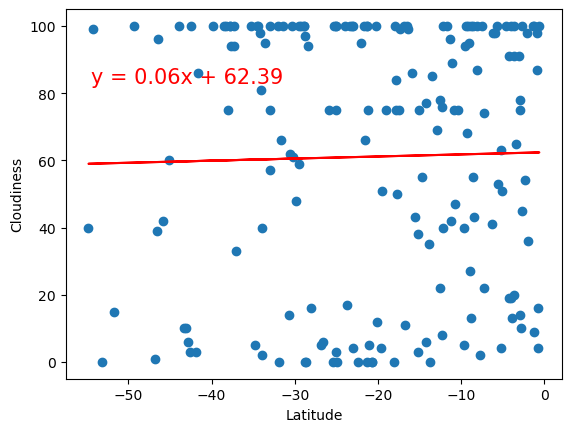

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and Cloudliness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012616108188327542


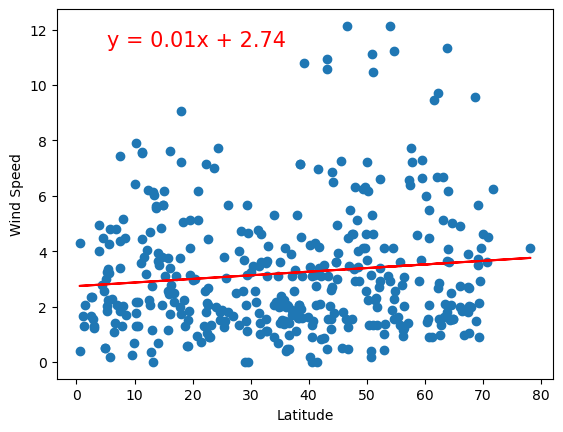

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.054594166833935635


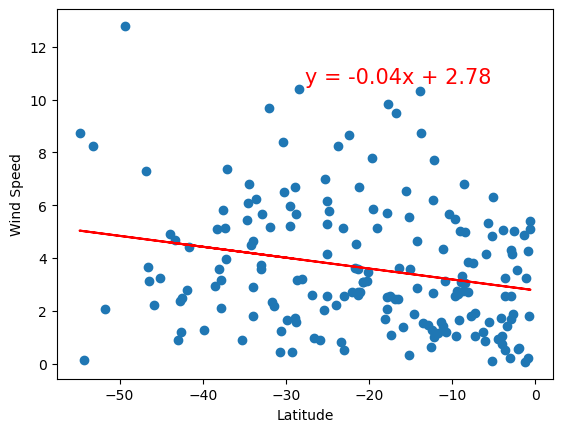

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** We can appreciate that for both Northern and SOuthern Hemisphere ther eis no correlation between latitude and Wind Speed